In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
k_on = 1  # per nM per 1
k_off = 20  # per s

# concentration
c_0 = 20 

n_steps = 10

# array of waiting time
ts = np.zeros(n_steps)

# create an array of occupancy
occupancy = np.zeros(n_steps)

# define rates r
r_on = k_on * c_0

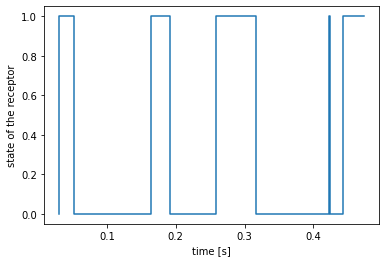

In [3]:
# main simulation
for t in range(n_steps):
    # Determine the current state of the receptor
    current_state = occupancy[t]
    
    # determine which rate to use
    if current_state == 0:
        r = r_on
    else:
        r = k_off
        
    # draw a random number to obtain a waiting time
    draw = np.random.rand()
    ts[t] = -np.log(draw) / r
    
    # update my occupancy
    if t < n_steps-1:
        occupancy[t+1] = 1 - current_state

# obtain absolute time
times = np.cumsum(ts)

# plot results
plt.step(times, occupancy)
plt.xlabel('time [s]')
plt.ylabel('state of the receptor');

In [4]:
time_bound = np.dot(ts, occupancy)
print(f'p_bound = {time_bound / np.sum(ts):.3f}')

p_bound = 0.291


In [5]:
def receptor_gillespie(r_on, r_off,  n_steps):
    # new arrays for waiting times and occupancy
    ts = np.zeros(n_steps)
    occupancy = np.zeros(n_steps)
    
    # main simulation
    for t in range(n_steps):
        # Determine the current state of the receptor
        current_state = occupancy[t]
    
        # determine which rate to use
        if current_state == 0:
            r = r_on
        else:
            r = r_off
            
        # draw waiting tine
        draw = np.random.rand()
        ts[t] = -np.log(draw) / r
        
        if t < n_steps-1:
            occupancy[t+1] = 1 - current_state
            
    # return p_bound
    time_bound = np.dot(occupancy, ts)
        
    return time_bound / np.sum(ts)

In [6]:
n_steps = 200
p_bound = receptor_gillespie(r_on, k_off, n_steps)
print(f'p_bound = {p_bound:.3f}')

p_bound = 0.447


In [7]:
# do several runs of the simulation
n_runs = 100
n_steps = 200

# record p_bound
p_bound = np.zeros(n_runs)

# loop through runs
for r in range(n_runs):
    p_bound[r] = receptor_gillespie(r_on, k_off, n_steps)
    
# print the average p_bound
print(f'the average p_bound = {np.mean(p_bound):.3f}')

the average p_bound = 0.499


Text(0, 0.5, 'p_mean')

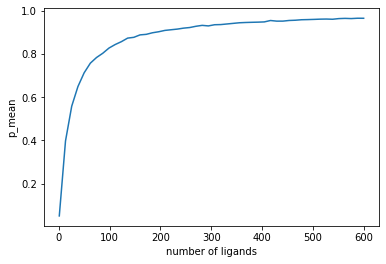

In [8]:
n_parameters = 50
# do several runs of the simulation
n_runs = 100
n_steps = 200

# set different values for ligands
lig_conc = np.linspace(1, 600, n_parameters)

# array for p_bound that is nparameters x n_runs in size
p_bound = np.zeros((n_parameters,n_runs))

# loop through runs
for l in range(n_parameters):
    c_0 = lig_conc[l]
    r_on = k_on * c_0
    
    for r in range(n_runs):
        p_bound[l, r] = receptor_gillespie(r_on, k_off, n_parameters)
    
p_mean = np.mean(p_bound, axis=1)

# plot p_mean vs lig_conc
plt.plot(lig_conc, p_mean, label='mean from simulation')
plt.xlabel('number of ligands')
plt.ylabel('p_mean')